<a href="https://colab.research.google.com/github/busrbsrho/Deep_Learning_Project/blob/main/Emotions_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
pip install optuna

In [193]:
pip install wordcloud

In [194]:
pip install textblob

In [195]:
pip install xgboost

In [196]:
# Data manipulation and analysis
import pandas as pd  # DataFrame operations
import numpy as np  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from wordcloud import WordCloud, ImageColorGenerator  # Word cloud generation
from PIL import Image  # Image processing

# Text processing
import string  # String operations
from nltk.tokenize import word_tokenize  # Tokenizing text
from nltk.corpus import stopwords  # Common stop words
from nltk.stem import PorterStemmer  # Stemming words
import nltk  # Natural language toolkit
nltk.download('punkt')  # Download tokenizer data
nltk.download('stopwords')  # Download stop words data

# Text analysis
from textblob import TextBlob  # Text processing library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text vectorization

# Data balancing
from sklearn.utils import resample  # Resampling data

# Data preparation
import optuna  # Hyperparameter tuning library
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV  # Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold

# Word embeddings
import gensim.downloader as api  # Download pre-trained Word2Vec models
from gensim.models import Word2Vec  # Word2Vec model

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # Ensemble models
from xgboost import XGBClassifier  # Extreme Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.svm import LinearSVC

from sklearn import metrics  # Evaluation metrics

from sklearn.dummy import DummyClassifier  # Dummy classifier
from sklearn.metrics import classification_report, confusion_matrix  # Evaluation metrics

from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding sequences
from tensorflow.keras.utils import to_categorical  # One-hot encoding
import tensorflow as tf  # Deep learning library
from tensorflow.keras.models import Sequential  # Sequential model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization, SpatialDropout1D  # Layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks

# Utility
import warnings  # Warning control
warnings.filterwarnings('ignore')  # Ignore warnings
from collections import Counter  # Count occurrences of elements

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# About the Dataset
Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

In [197]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/kaggle_files/text.csv', index_col=0)
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# Exploratory data analysis (EDA) and some Preproccessing
let's explore the dataset and see if there are some conclusions that we can make by looking the dataset itself without using models.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [199]:
df.describe()

,label
count,416809.000000
mean,1.554271
std,1.490453
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [200]:
def classes_plot(df):
  fig , ax = plt.subplots(figsize=(6,4))
  sns.countplot(x='label', data=df, color='cyan')
  plt.title("sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)")
  plt.show()

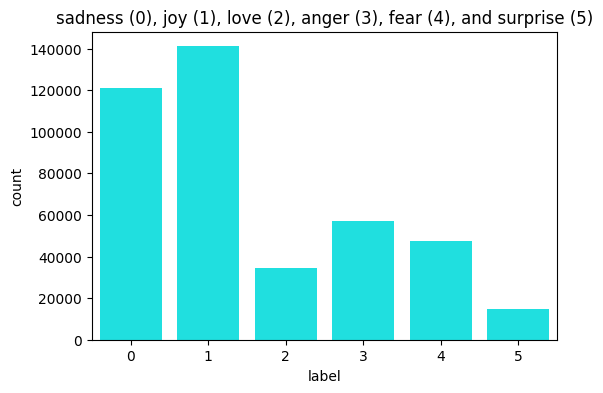

In [201]:
classes_plot(df)

### As we can see the dataset is not balanced, so we use undersample technique to make the dataset balanced according to the smallest class (surprise)


In [202]:
# Splitting the dataset to 3 different datasets as mentioned above
# Starting with the simple one - keeping the original dataset
original_df = df

Number of data for each class is: 7486


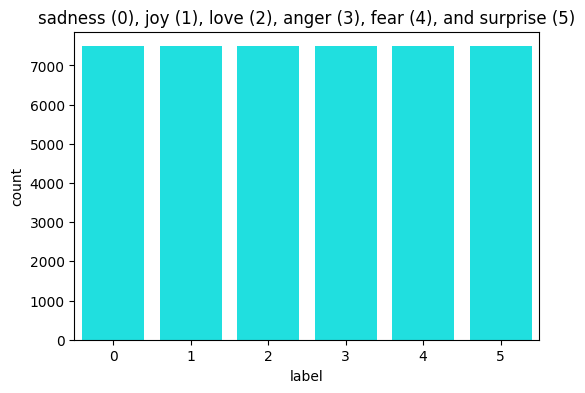

,text,label
0,i feel shaken up and torn down,4
1,on reperbahn,3
2,i feel insulted that he doesnt know me better ...,3
3,i imagine that my fellow liberals get the same...,3
4,i dont know why im writing it here and not tel...,3


In [203]:
# Now we will apply undersampling to the majority class to match class 5

# Separate the dataset by class
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_2 = df[df['label'] == 2]
df_3 = df[df['label'] == 3]
df_4 = df[df['label'] == 4]
df_5 = df[df['label'] == 5]

# Saving the amount of data in label 5
n_samples_label_5 = round(len(df_5) / 2)

# Downsample the majority classes to n_samples_label_5 samples
# The random_state variable act like a seed.
# Setting random_state=42 helps in making your code reproducible and ensures that the results are consistent across different runs.
df_0_downsampled = resample(df_0, replace=False, n_samples=n_samples_label_5, random_state=42)
df_1_downsampled = resample(df_1, replace=False, n_samples=n_samples_label_5, random_state=42)
df_2_downsampled = resample(df_2, replace=False, n_samples=n_samples_label_5, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=n_samples_label_5, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=n_samples_label_5, random_state=42)
df_5_downsampled = resample(df_5, replace=False, n_samples=n_samples_label_5, random_state=42)

# Combine the downsampled data with the minority class data along the y-axis
df_downsampled = pd.concat([df_1_downsampled, df_0_downsampled, df_3_downsampled, df_4_downsampled, df_2_downsampled, df_5_downsampled])

# Shuffle the combined dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of data for each class is: {n_samples_label_5}")
classes_plot(df_downsampled)
df_downsampled.head()

In [204]:
def extract_href_sentence_lengths(df, text_column='text'):
    """
    Extracts the lengths of sentences that start with the words 'href', 'http' and 'www' in a given DataFrame column.

    Parameters:
    - df: DataFrame containing the data
    - text_column: Name of the column containing text data (default: 'text')

    Returns:
    - Lists of sentence lengths that start with 'href', 'http' and 'www'
    """
    href_sentence_lengths = []
    http_sentence_lengths = []
    www_sentence_lengths = []
    # Iterate through each text in the DataFrame
    for text in df[text_column]:
        # Split text into sentences based on common sentence delimiters
        sentences = text.split(' ')
        for sentence in sentences:
            if sentence.lower().startswith('href'):
                href_sentence_lengths.append(len(text))
            elif sentence.lower().startswith('http'):
                http_sentence_lengths.append(len(text))
            elif sentence.lower().startswith('www'):
                www_sentence_lengths.append(len(text))
    return href_sentence_lengths, http_sentence_lengths, www_sentence_lengths

In [205]:
def plot_text_length_distribution(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Plots the distribution of text lengths by class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    df['text_length'] = df[text_column].apply(len)
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x='text_length', hue=label_column, multiple='stack', bins=30)
    plt.title(f"Distribution of Text Lengths by Class for '{df_name}' dataset")
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

In [206]:
def plot_word_clouds(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Generates word clouds for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    def plot_word_cloud(text, label):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(9, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for Label {label} in '{df_name}' dataset")
        plt.axis('off')
        plt.show()

    for label in df[label_column].unique():
        text = ' '.join(df[df[label_column] == label][text_column])
        plot_word_cloud(text, label)

In [207]:
# Function to plot the most common words for each class
def plot_top_n_words(df, df_name='DataFrame', text_column='text', label_column='label', n=10):
    """
    Plots the top N most common words for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    param: n: Number of top words to plot (default: 10)
    """
    def plot_words(text, label, n):
        vec = CountVectorizer().fit(text)
        bag_of_words = vec.transform(text)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*words_freq)
        plt.figure(figsize=(10, 4))
        sns.barplot(x=freqs, y=words)
        plt.title(f"Top {n} Words for Label {label} in '{df_name}' dataset")
        plt.xlabel('Frequency')
        plt.ylabel('Word')
        plt.show()

    for label in df[label_column].unique():
        text = df[df[label_column] == label][text_column]
        plot_words(text, label, n)

In [208]:
# Function to plot the most common bigrams and trigrams for each class
def plot_ngrams(df, df_name='DataFrame', text_column='text', label_column='label', ngram_range=(2, 2), n=10):
    """
    Plots the most common n-grams (bigrams or trigrams) for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    param: ngram_range: Tuple specifying the n-gram range (default: (2, 2))
    param: n: Number of top n-grams to plot (default: 10)
    """
    def plot_ngrams_for_label(text, label, ngram_range, n):
        vec = CountVectorizer(ngram_range=ngram_range).fit(text)
        bag_of_words = vec.transform(text)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*words_freq)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=freqs, y=words)
        plt.title(f"Top {n} {'-'.join(map(str, ngram_range))}grams for Label {label} in '{df_name}' dataset")
        # plt.title(f'Top {n} {"-".join(map(str, ngram_range))}grams for Label {label}')
        plt.xlabel('Frequency')
        plt.ylabel('N-gram')
        plt.show()

    for label in df[label_column].unique():
        text = df[df[label_column] == label][text_column]
        plot_ngrams_for_label(text, label, ngram_range, n)

In [209]:
# Function to plot the sentiment polarity distribution by class
def plot_sentiment_distribution(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Plots the distribution of sentiment polarity scores by class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=label_column, y='sentiment', data=df)
    plt.title(f"Sentiment Polarity Distribution by Class for '{df_name}' daaset")
    plt.xlabel('Label')
    plt.ylabel('Sentiment Polarity')
    plt.show()

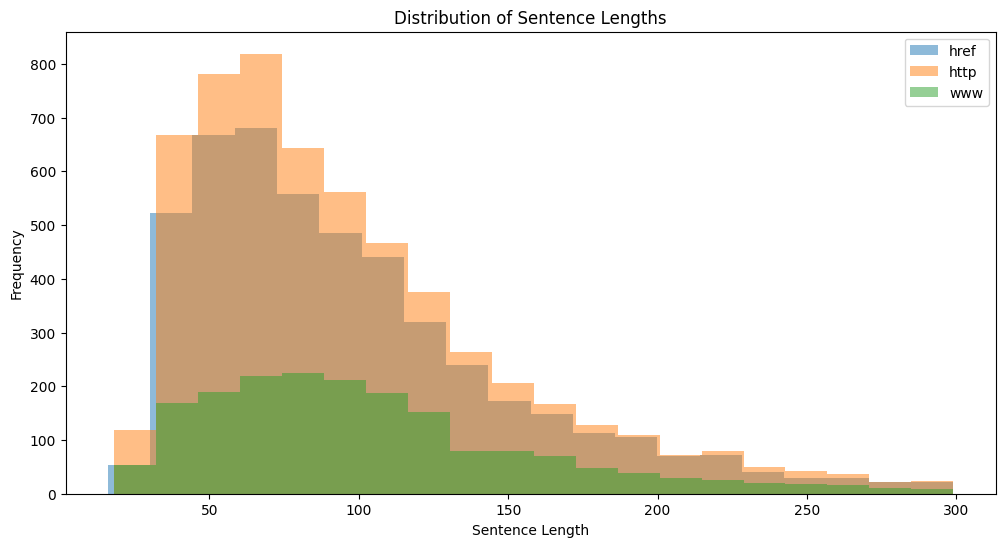

Number of sentences starting with 'href': 4789
Number of sentences starting with 'http': 5632
Number of sentences starting with 'www': 1855


In [210]:
# Extract lengths of sentences starting with 'href' and 'http' and 'www'
href_sentence_lengths, http_sentence_lengths, www_sentence_lengths = extract_href_sentence_lengths(df)
# plotting the distribution of each array

plt.figure(figsize=(12, 6))
plt.hist(href_sentence_lengths, bins=20, alpha=0.5, label='href')
plt.hist(http_sentence_lengths, bins=20, alpha=0.5, label='http')
plt.hist(www_sentence_lengths, bins=20, alpha=0.5, label='www')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.legend()
plt.show()
print(f"Number of sentences starting with 'href': {len(href_sentence_lengths)}")
print(f"Number of sentences starting with 'http': {len(http_sentence_lengths)}")
print(f"Number of sentences starting with 'www': {len(www_sentence_lengths)}")

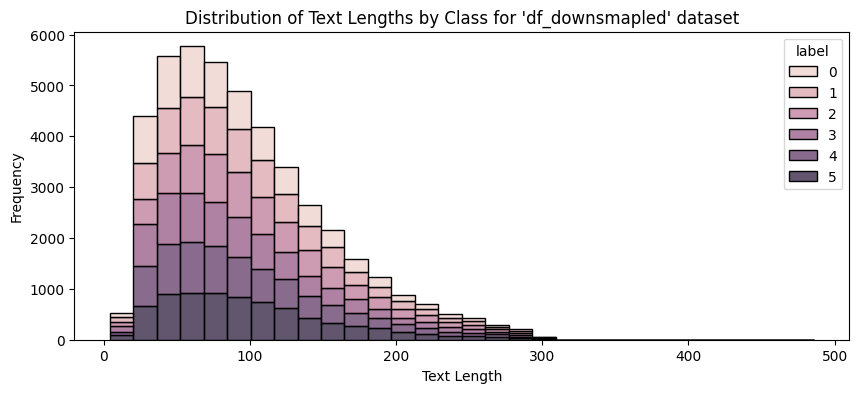

In [211]:
# Plotting te text length for both original_df and df_downsampled to see the difference
# plot_text_length_distribution(df=original_df, df_name='original_df')
plot_text_length_distribution(df_downsampled, df_name='df_downsmapled')

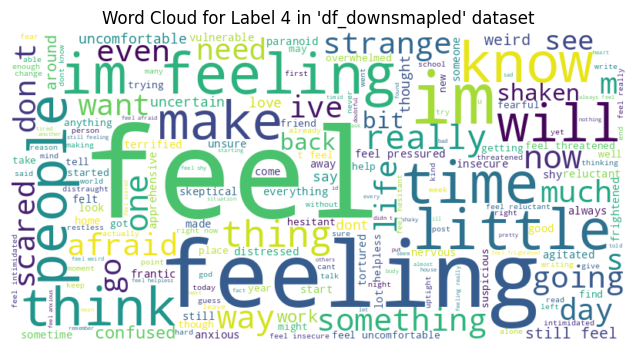

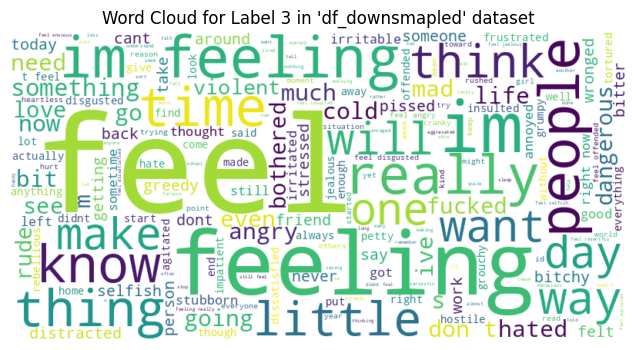

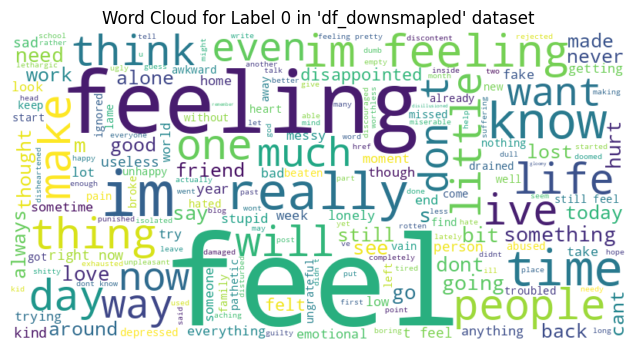

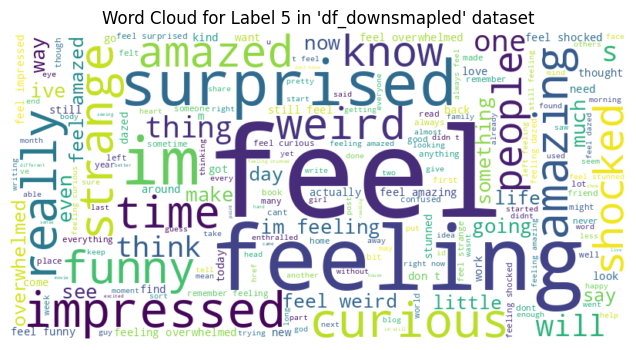

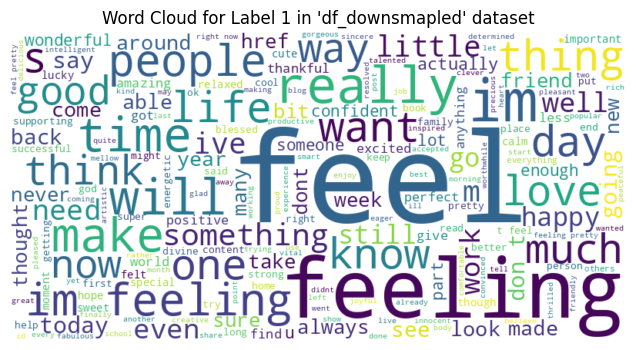

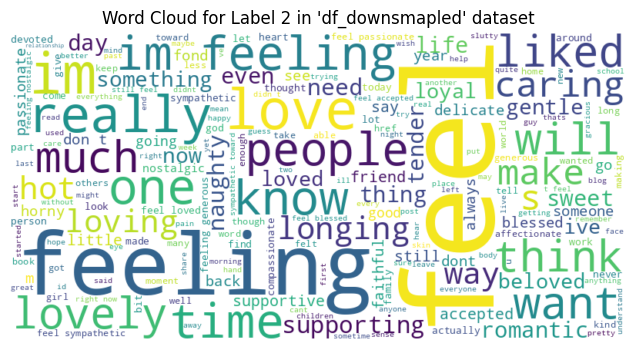

In [212]:
plot_word_clouds(df=df_downsampled, df_name='df_downsmapled')
# plot_word_clouds(df=original_df, df_name='original_df')

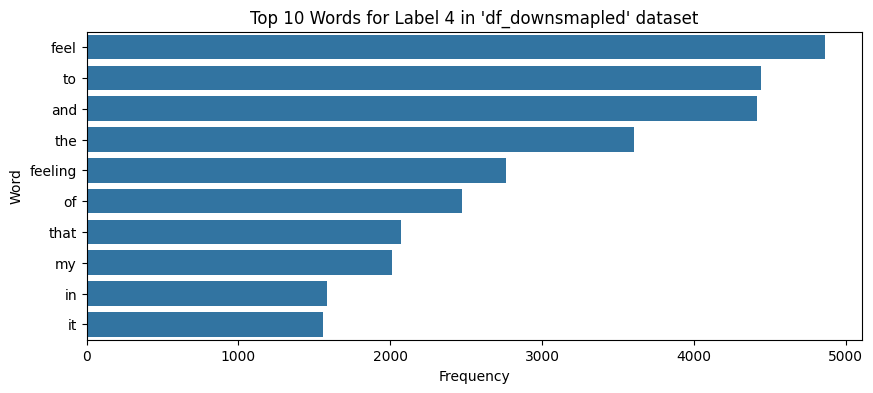

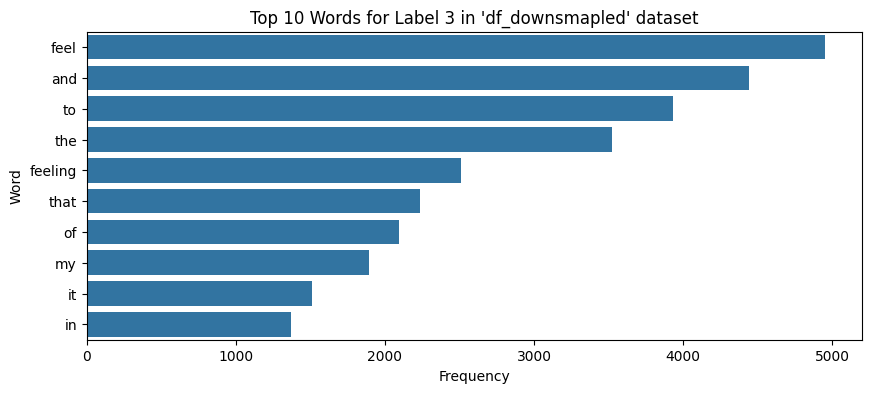

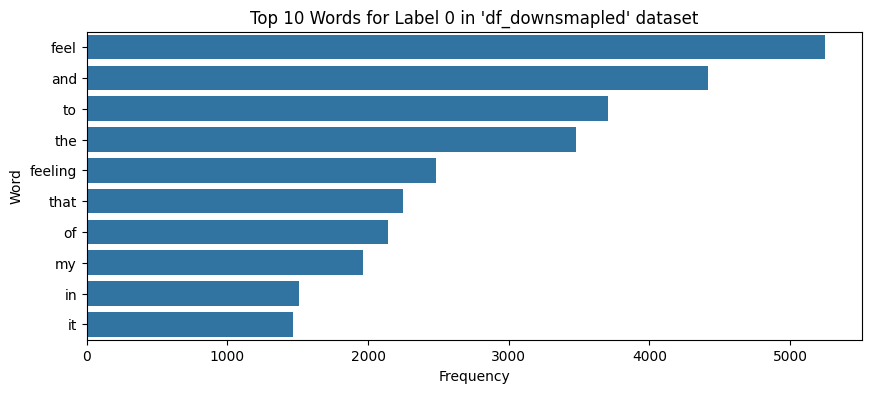

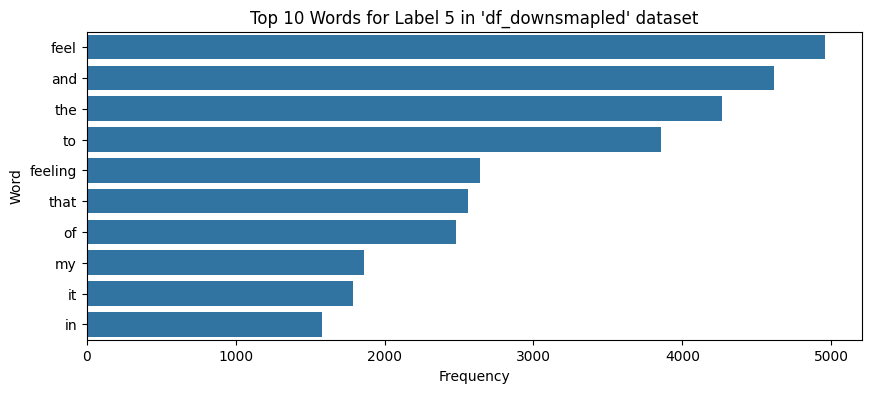

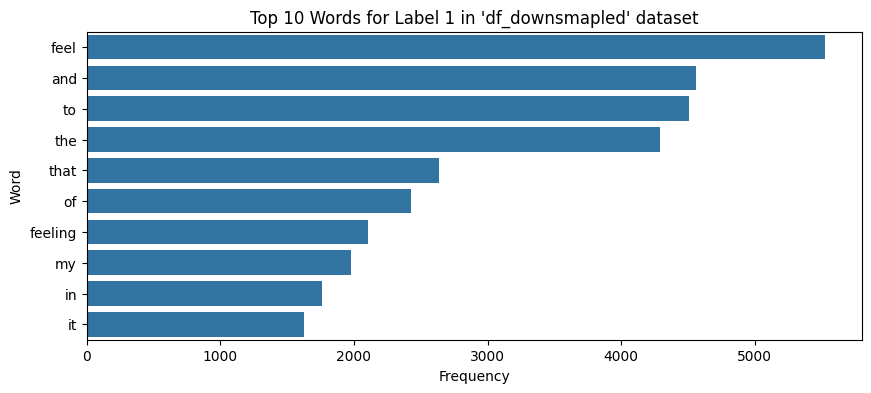

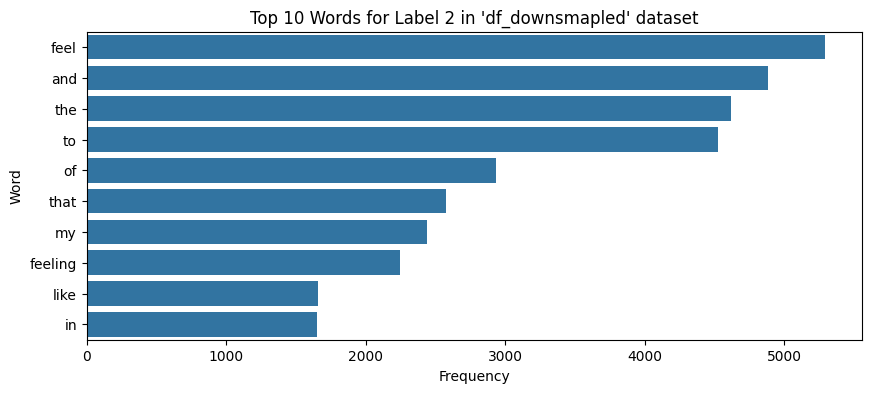

In [213]:
plot_top_n_words(df=df_downsampled, df_name='df_downsmapled')
# plot_top_n_words(df=original_df,  df_name='original_df')

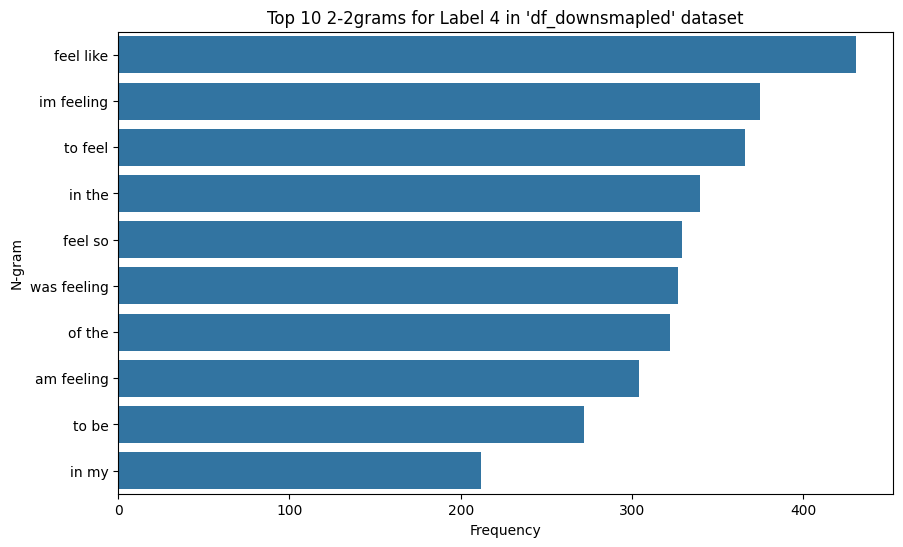

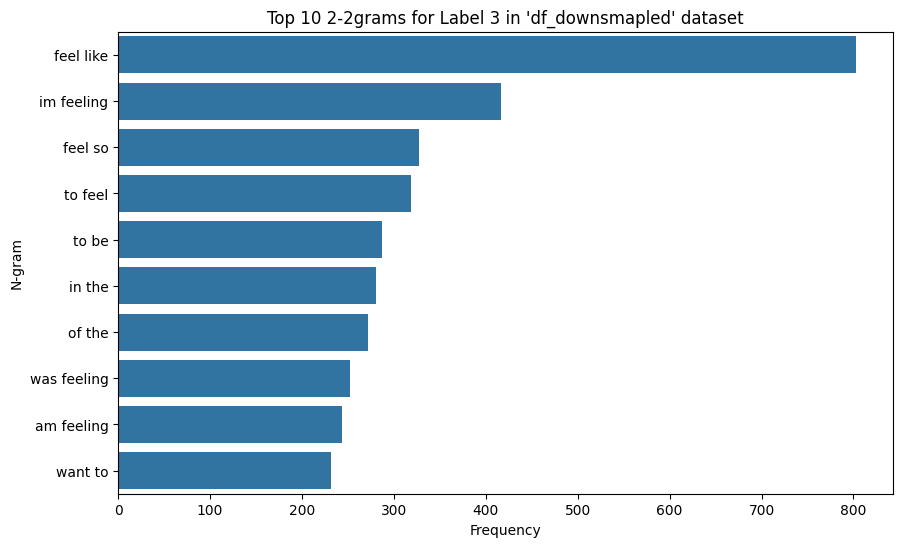

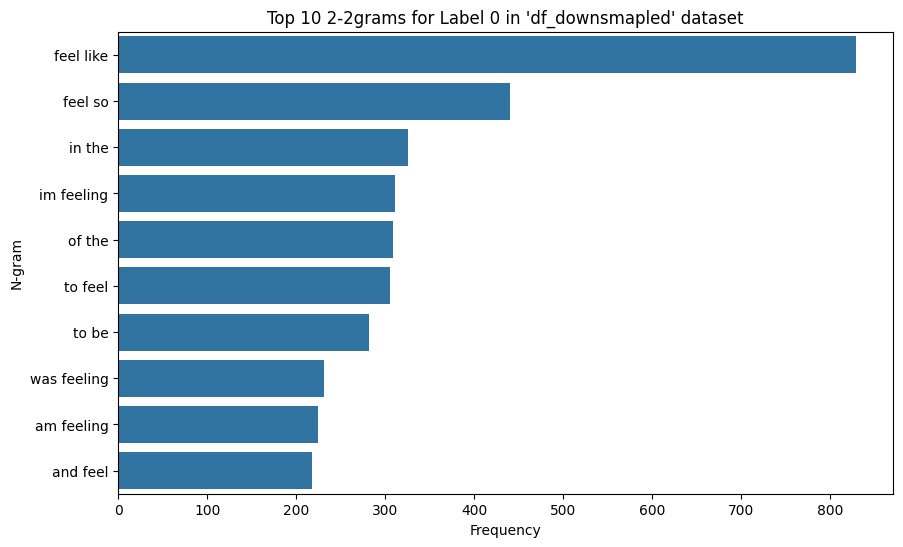

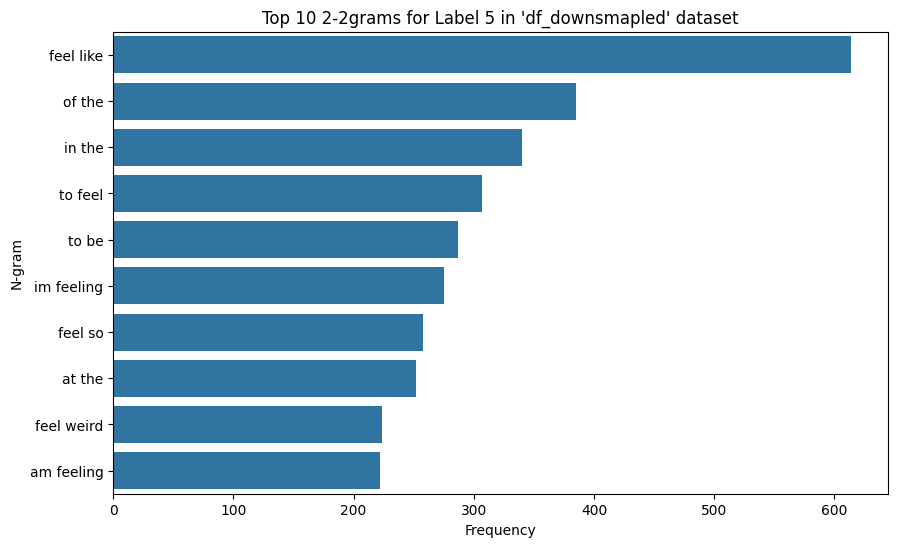

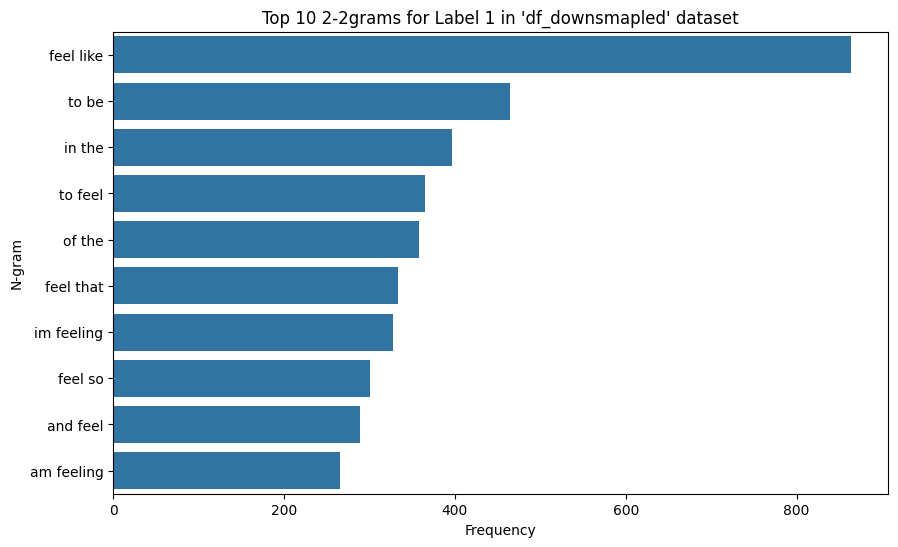

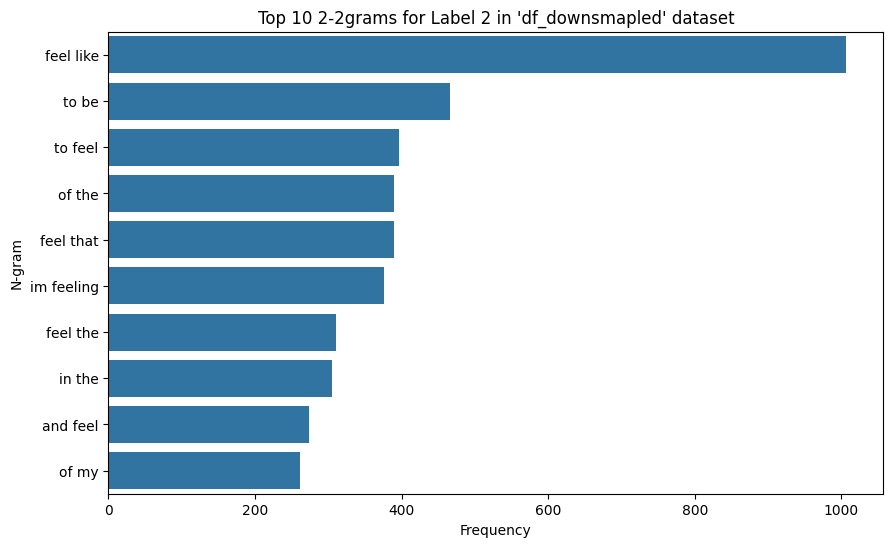

In [214]:
plot_ngrams(df=df_downsampled,  df_name='df_downsmapled', ngram_range=(2, 2))  # For bigrams
# plot_ngrams(df=original_df,  df_name='original_df', ngram_range=(2, 2))  # For bigrams

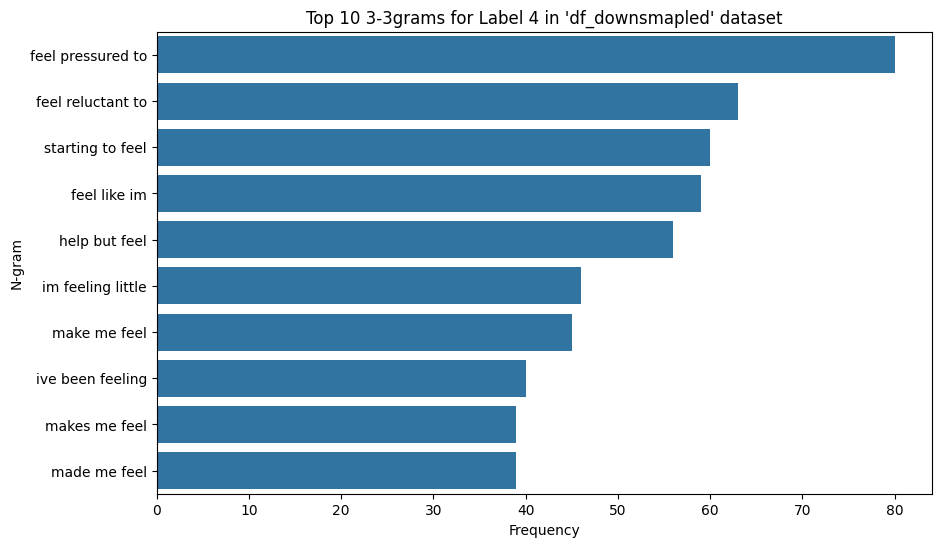

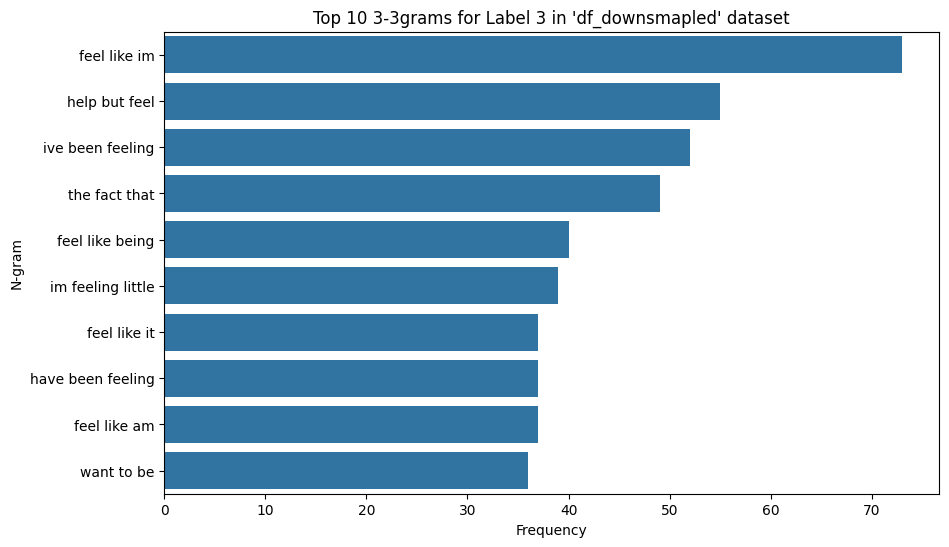

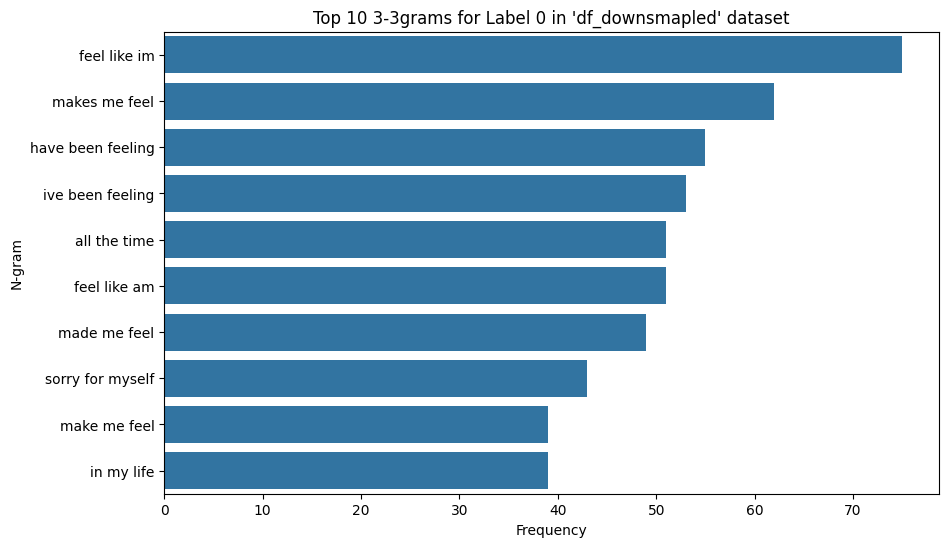

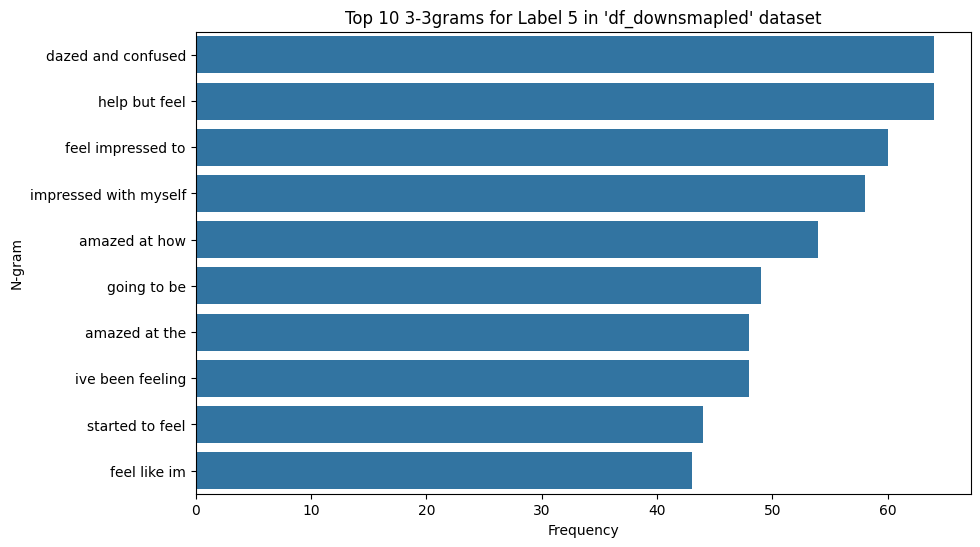

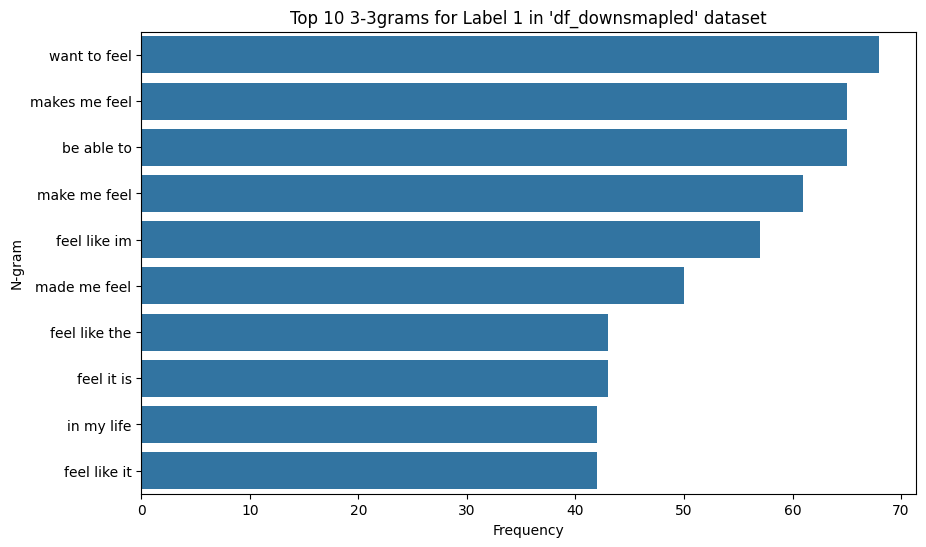

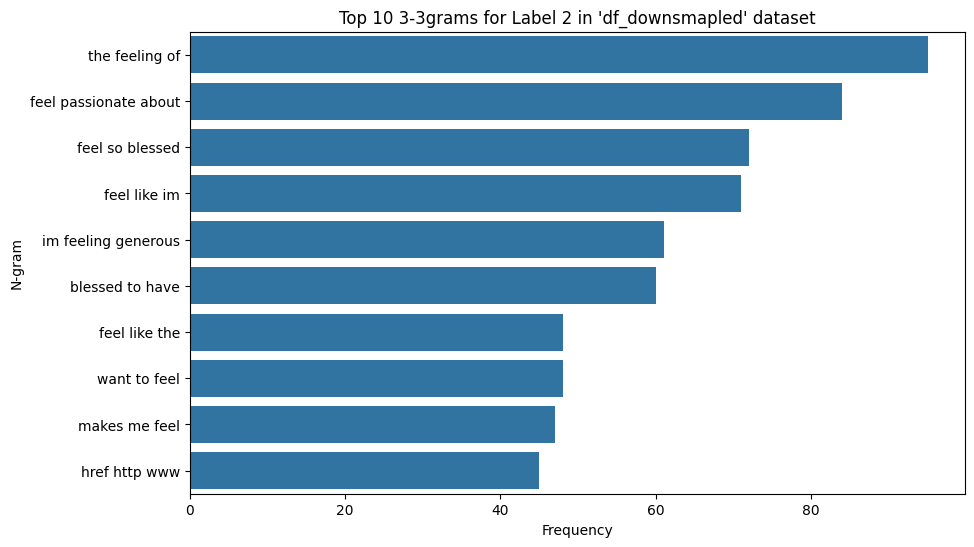

In [215]:
plot_ngrams(df=df_downsampled,  df_name='df_downsmapled', ngram_range=(3, 3))  # For trigrams
# plot_ngrams(df=original_df,  df_name='original_df', ngram_range=(3, 3))  # For trigrams

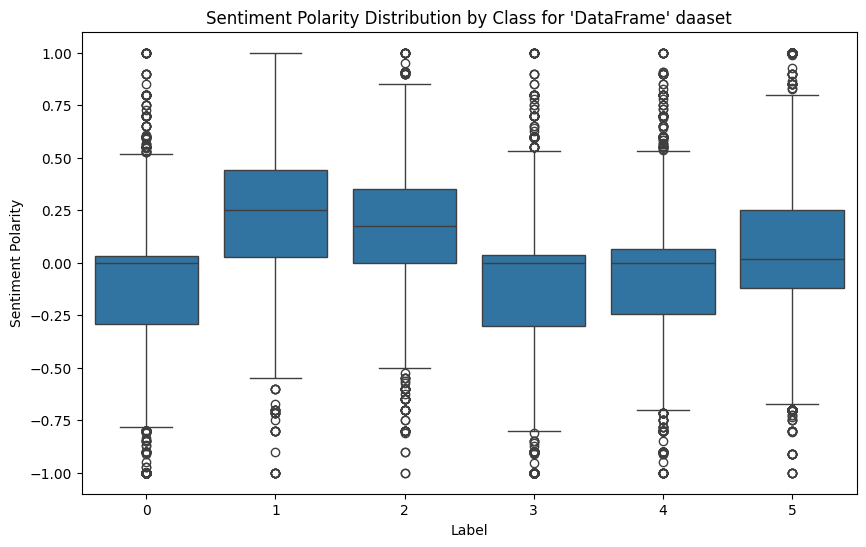

In [216]:
plot_sentiment_distribution(df_downsampled) # Should discuss if it's important or not
# plot_sentiment_distribution(original_df) # Should discuss if it's important or not

<Axes: xlabel='sentiment', ylabel='Density'>

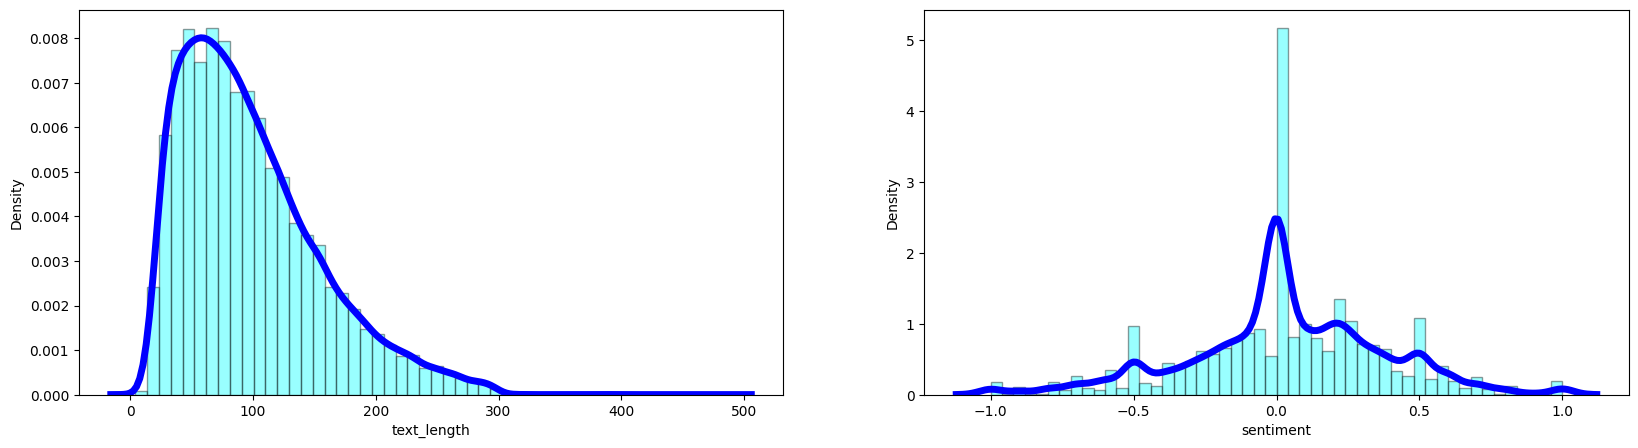

In [217]:
fig, axes = plt.subplots(1,2, figsize = (20,5))
sns.distplot(df_downsampled['text_length'], hist=True, kde=True,
             color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[0])

sns.distplot(df_downsampled['sentiment'], hist=True, kde=True,
             color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[1])

# Pre-proccessing in the text phase
In the next few codes (functions), we will apply several techniques such as: Tokenization, Removing stop words, Stemming, Vectorization, and Embedding.

This applied to make the dataset simpler by splitting the words from each other, removing unneccessary words (that don't contribute to the whole sentence), stemming to convert the words to their base form, vectorization

In [218]:
## tokenization refers to breaking down a sentence into individual words.
def tokenize_text(df, text_column='text'):
    """
    Tokenizes the text data.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing text data (default: 'text')
    return: DataFrame with tokenized text
    type: (DataFrame, str) -> DataFrame
    """
    df['tokenized_text'] = df[text_column].apply(word_tokenize)
    return df

In [219]:
def remove_stop_words(df, text_column='tokenized_text'):
    """
    Removes stop words from the tokenized text.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing tokenized text data (default: 'tokenized_text')
    return: DataFrame with stop words removed
    type: (DataFrame, str) -> DataFrame
    """
    custom_stopwords = {"i","im","like", "feel", "feeling", "my", "the", "to", "still"
                        "for","know","littl","think","time","thing","would","go",
                        "really","feel","am","so","get", "one", "to", "and", "at", "can",
                        "day","way", "make", "me", "want", "could" , "would", "tri", "u", "href", "http", "www", "com", "https"
                        }
    stop_words = set(stopwords.words('english'))
    stop_words.update(custom_stopwords)
    df['text_no_stopwords'] = df[text_column].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    return df

In [220]:
def apply_stemming(df, text_column='text_no_stopwords'):
    """
    Applies stemming to the text data.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing text data without stop words (default: 'text_no_stopwords')
    return: DataFrame with stemmed text
    type: (DataFrame, str) -> DataFrame
    """
    stemmer = PorterStemmer()
    df['stemmed_text'] = df[text_column].apply(lambda x: [stemmer.stem(word) for word in x])
    return df

In [221]:
def load_glove_vectors(glove_file):
    """
    Loads GloVe vectors from a file.

    param: glove_file: Path to the GloVe file
    return: Dictionary of word to vector mappings
    type: str -> dict
    """
    glove_model = {}
    with open(glove_file, 'r', encoding='utf8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    return glove_model

In [222]:
def get_glove_embeddings(df, glove_model, text_column='stemmed_text'):
    """
    Gets word embeddings using GloVe.

    param: df: DataFrame containing the data
    param: glove_model: Dictionary of GloVe vectors
    param: text_column: Name of the column containing stemmed text data (default: 'stemmed_text')
    return: DataFrame with word embeddings
    type: (DataFrame, dict, str) -> DataFrame
    """
    def embed_text(tokens):
        embedding_dim = len(next(iter(glove_model.values())))
        embeddings = [glove_model[word] for word in tokens if word in glove_model]
        if embeddings:
            return np.mean(embeddings, axis=0)
        else:
            return np.zeros(embedding_dim)

    df['text_embedding'] = df[text_column].apply(embed_text)
    return df

In [223]:
def preprocess_text_data(df, glove_model, text_column='text', label_column='label'):
    """
    Preprocesses text data through tokenization, stop word removal, stemming, and embedding.

    param: df: DataFrame containing the data
    param: glove_model: Dictionary of GloVe vectors
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    return: Preprocessed DataFrame with embeddings
    type: (DataFrame, dict, str, str) -> DataFrame
    """
    df = tokenize_text(df, text_column)
    df = remove_stop_words(df)
    df = apply_stemming(df)
    df = get_glove_embeddings(df, glove_model)
    return df

In [224]:
# Load GloVe model
glove_file = "drive/MyDrive/kaggle_files/glove.6B.100d.txt"  # Path to the GloVe file
glove_model = load_glove_vectors(glove_file)

In [225]:
import nltk
nltk.download('punkt_tab')
df_downsampled_preprocessed = preprocess_text_data(df_downsampled, glove_model)
# df_preprocessed = preprocess_text_data(original_df)
print(df_downsampled_preprocessed.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                text  label  text_length  \
0                     i feel shaken up and torn down      4           30   
1                                       on reperbahn      3           12   
2  i feel insulted that he doesnt know me better ...      3           55   
3  i imagine that my fellow liberals get the same...      3          150   
4  i dont know why im writing it here and not tel...      3          131   

   sentiment                                     tokenized_text  \
0  -0.155556             [i, feel, shaken, up, and, torn, down]   
1   0.000000                                    [on, reperbahn]   
2   0.500000  [i, feel, insulted, that, he, doesnt, know, me...   
3   0.183333  [i, imagine, that, my, fellow, liberals, get, ...   
4   0.000000  [i, dont, know, why, im, writing, it, here, an...   

                                   text_no_stopwords  \
0                                     [shaken, torn]   
1                           

In [226]:
df_downsampled_preprocessed.head()

,text,label,text_length,sentiment,tokenized_text,text_no_stopwords,stemmed_text,text_embedding
0,i feel shaken up and torn down,4,30,-0.155556,"[i, feel, shaken, up, and, torn, down]","[shaken, torn]","[shaken, torn]","[-0.533135, 0.509355, 0.160105, -0.267755, -0...."
1,on reperbahn,3,12,0.000000,"[on, reperbahn]",[reperbahn],[reperbahn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,i feel insulted that he doesnt know me better ...,3,55,0.500000,"[i, feel, insulted, that, he, doesnt, know, me...","[insulted, doesnt, better]","[insult, doesnt, better]","[-0.14870433333333333, 0.30715000000000003, 0...."
3,i imagine that my fellow liberals get the same...,3,150,0.183333,"[i, imagine, that, my, fellow, liberals, get, ...","[imagine, fellow, liberals, warm, feelings, re...","[imagin, fellow, liber, warm, feel, read, mess...","[-0.20008642857142855, 0.3273742857142857, 0.1..."
4,i dont know why im writing it here and not tel...,3,131,0.000000,"[i, dont, know, why, im, writing, it, here, an...","[dont, writing, telling, bet, theyre, totally,...","[dont, write, tell, bet, theyr, total, unawar,...","[-0.027195619999999997, 0.16288940000000002, 0..."


In [227]:
df_downsampled_preprocessed['sentence_stemmed_text'] = df_downsampled_preprocessed['stemmed_text'].apply(lambda x: ','.join(x))

In [228]:
df_downsampled_preprocessed.head()

,text,label,text_length,sentiment,tokenized_text,text_no_stopwords,stemmed_text,text_embedding,sentence_stemmed_text
0,i feel shaken up and torn down,4,30,-0.155556,"[i, feel, shaken, up, and, torn, down]","[shaken, torn]","[shaken, torn]","[-0.533135, 0.509355, 0.160105, -0.267755, -0....","shaken,torn"
1,on reperbahn,3,12,0.000000,"[on, reperbahn]",[reperbahn],[reperbahn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",reperbahn
2,i feel insulted that he doesnt know me better ...,3,55,0.500000,"[i, feel, insulted, that, he, doesnt, know, me...","[insulted, doesnt, better]","[insult, doesnt, better]","[-0.14870433333333333, 0.30715000000000003, 0....","insult,doesnt,better"
3,i imagine that my fellow liberals get the same...,3,150,0.183333,"[i, imagine, that, my, fellow, liberals, get, ...","[imagine, fellow, liberals, warm, feelings, re...","[imagin, fellow, liber, warm, feel, read, mess...","[-0.20008642857142855, 0.3273742857142857, 0.1...","imagin,fellow,liber,warm,feel,read,messag,cons..."
4,i dont know why im writing it here and not tel...,3,131,0.000000,"[i, dont, know, why, im, writing, it, here, an...","[dont, writing, telling, bet, theyre, totally,...","[dont, write, tell, bet, theyr, total, unawar,...","[-0.027195619999999997, 0.16288940000000002, 0...","dont,write,tell,bet,theyr,total,unawar,dissatisfi"


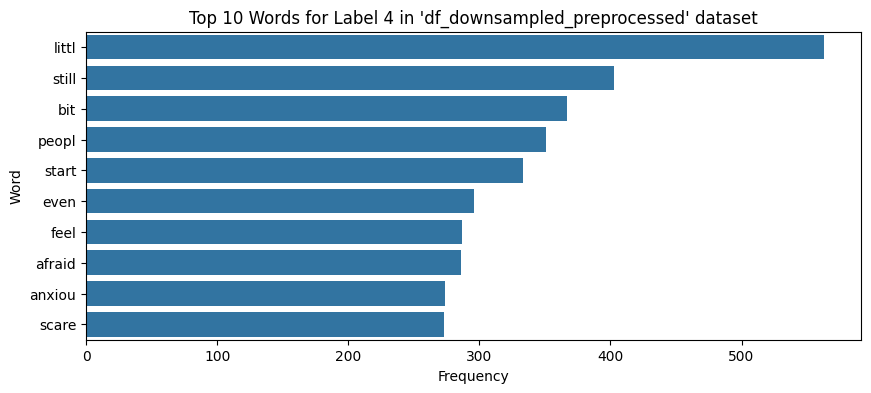

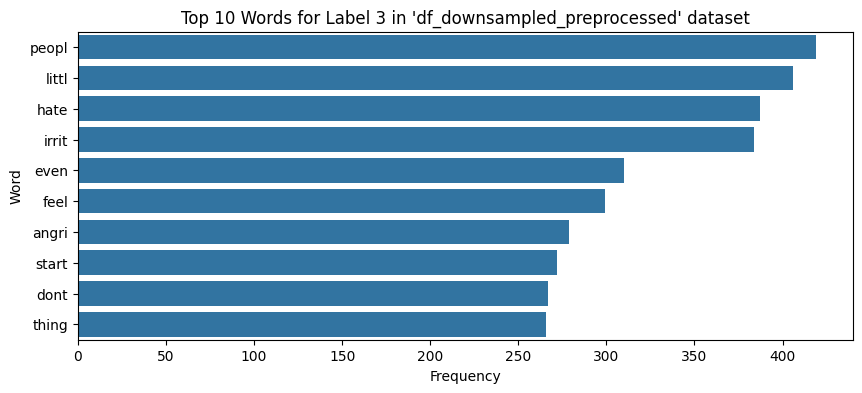

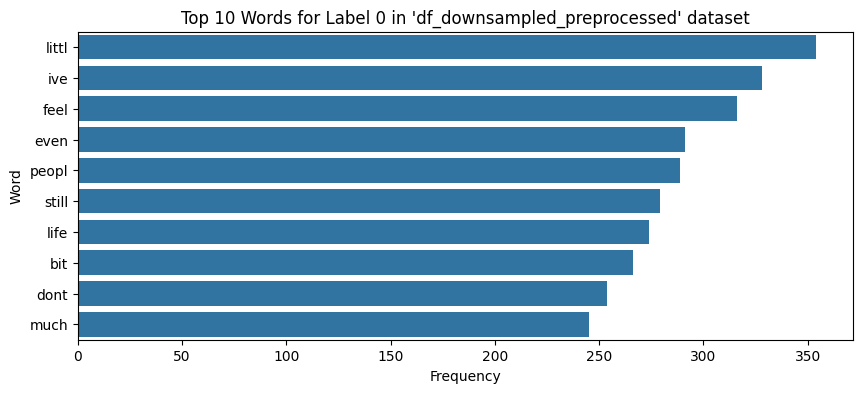

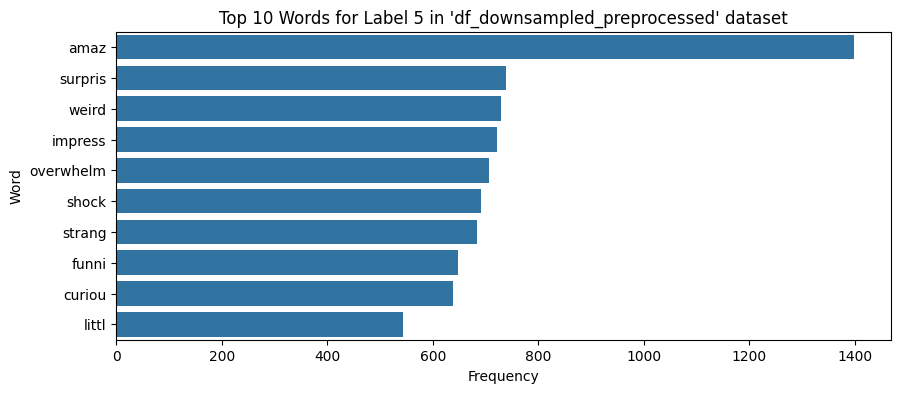

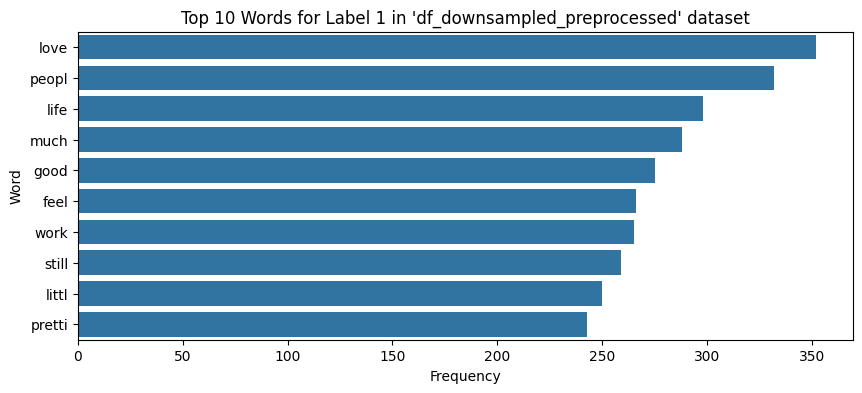

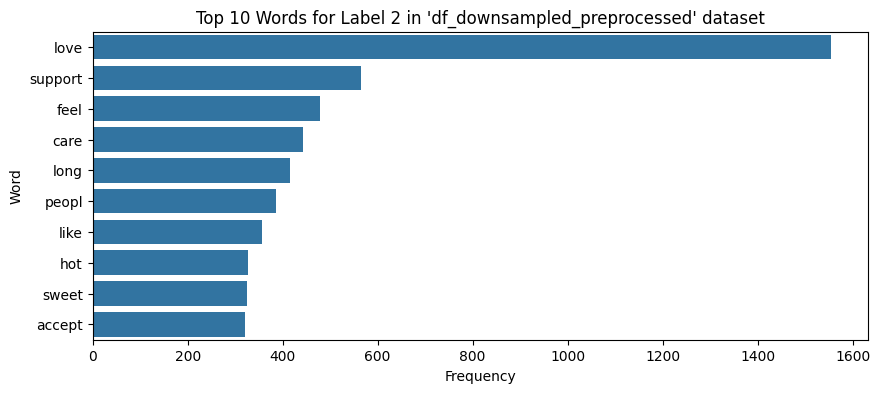

In [229]:
plot_top_n_words(df=df_downsampled_preprocessed, df_name='df_downsampled_preprocessed', text_column='sentence_stemmed_text')

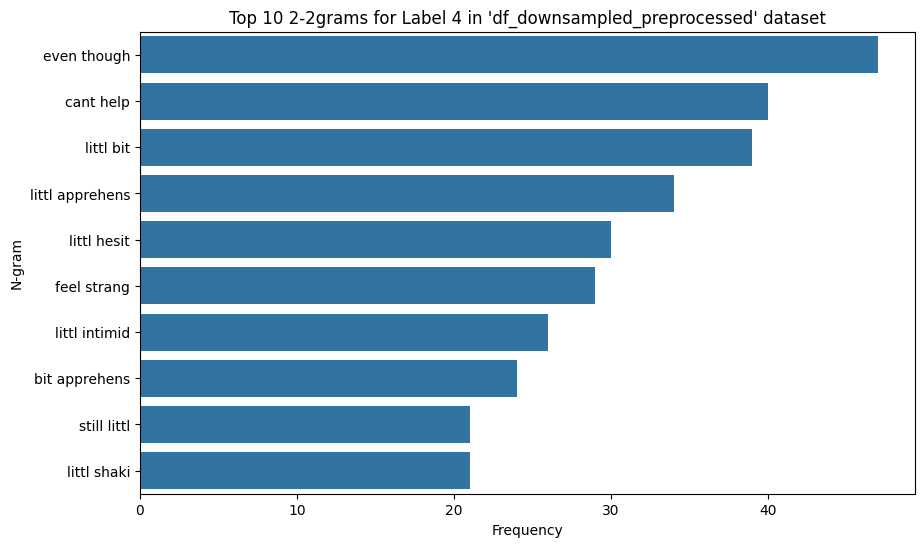

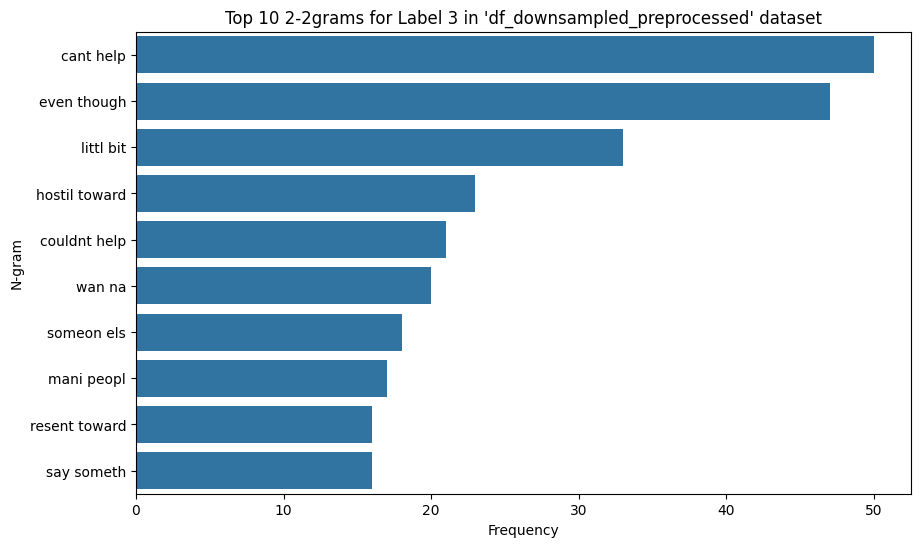

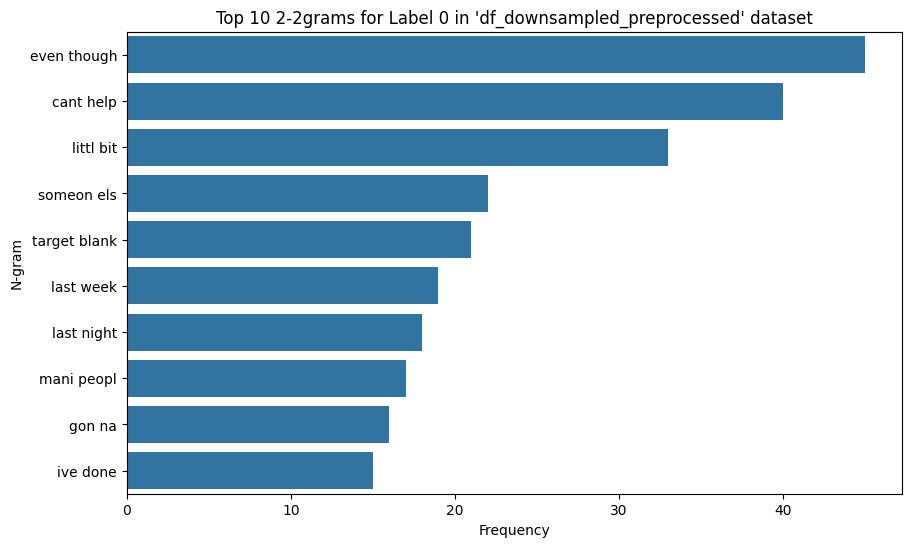

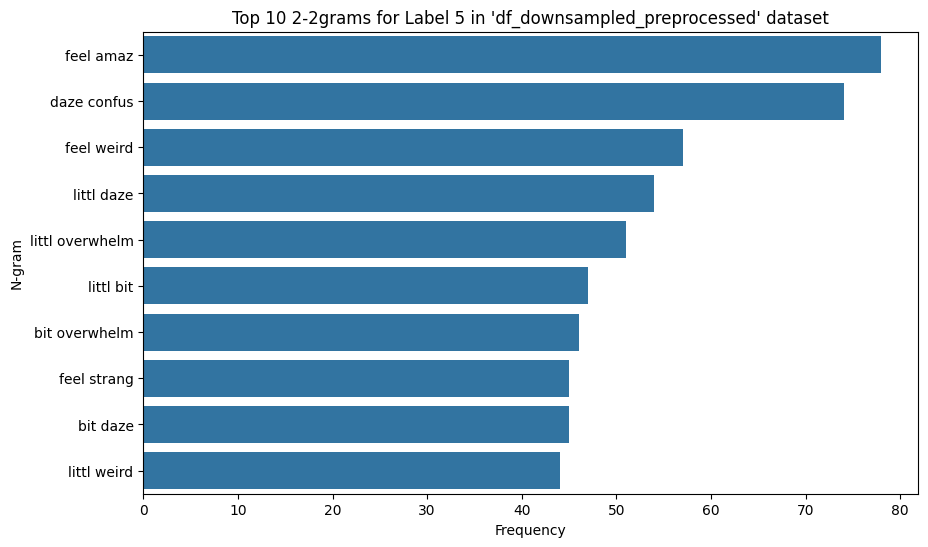

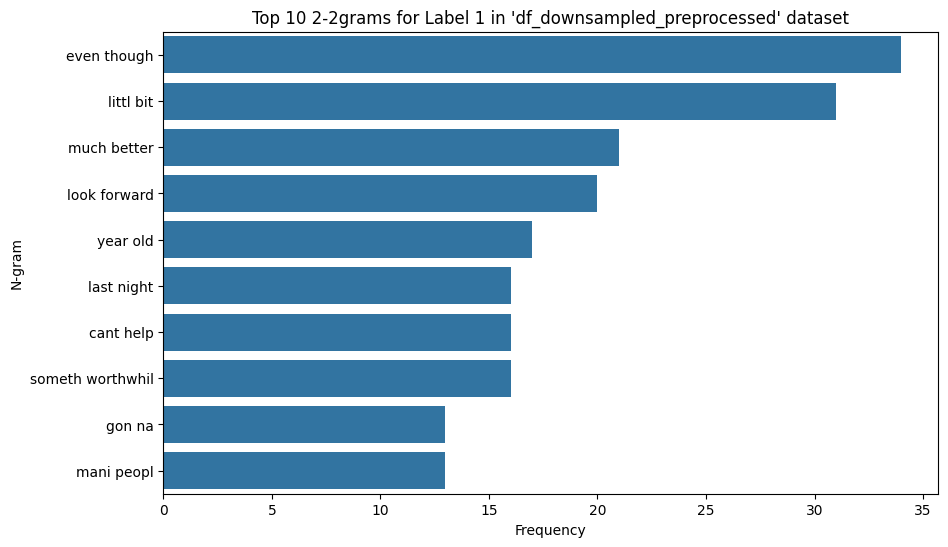

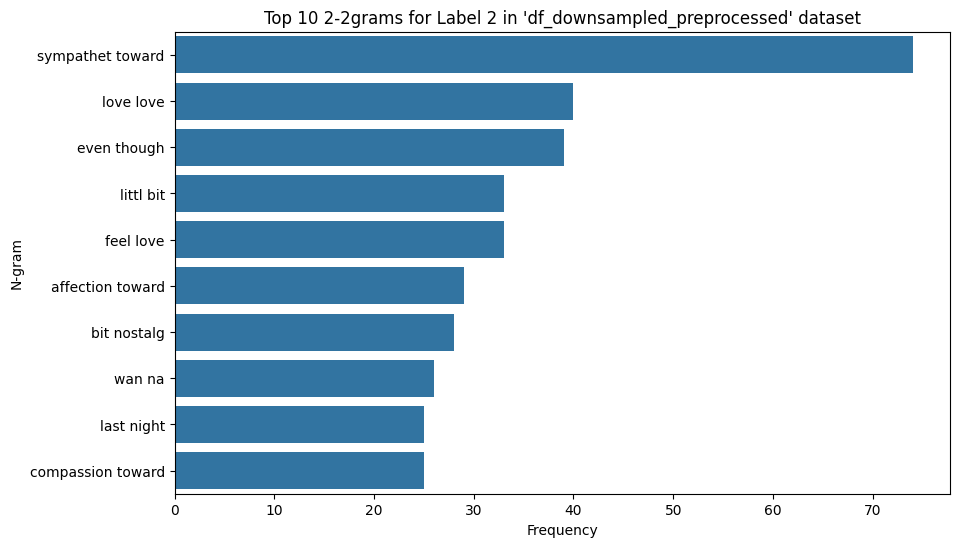

In [230]:
plot_ngrams(df=df_downsampled_preprocessed,  df_name='df_downsampled_preprocessed', text_column='sentence_stemmed_text', ngram_range=(2, 2))  # For bigrams

<Axes: >

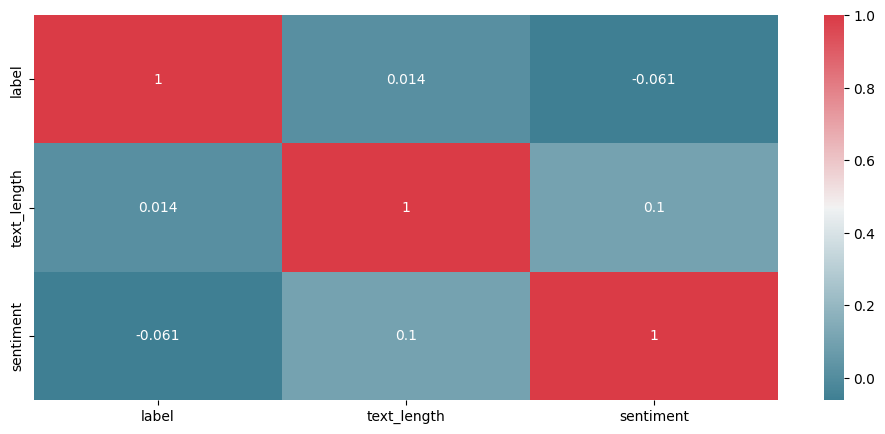

In [231]:
plt.subplots(figsize=(12,5))
df = df_downsampled_preprocessed.drop(['text', 'tokenized_text', 'text_no_stopwords', 'stemmed_text', 'text_embedding', 'sentence_stemmed_text'], axis=1)
corr = df.corr()
sns.heatmap(corr,annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

# Splitting data

In [232]:
def split_data(df, test_size=0.2, random_state=42):
  """
  Splits the dataset into training and testing sets.

  param: df: DataFrame containing the data
  param: test_size: Size of the testing set (default: 0.2)
  param: random_state: Random seed for reproducibility (default: 42)

  return: X_train, X_test, y_train, y_test
  """
  # Extract features and target
  # text_length = df['text_length'].values.reshape(-1, 1) tried to omit this column and found out that the results better without this column
  sentiment = df['sentiment'].values.reshape(-1, 1)
  X_embeddings = np.vstack(df['text_embedding'].values)

  # Concatenate features
  # X = np.hstack((text_length, sentiment, X_embeddings))
  X = np.hstack((sentiment, X_embeddings))

  # Extract target
  y = df['label'].values

  # Split to train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

  return X_train, X_test, y_train, y_test

In [233]:
# X_train_original, X_test_original, y_train_original, y_test_original = split_data(df=original_df, test_size=0.3)
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = split_data(df_downsampled_preprocessed)
print(f"Train set length for df_downsampled dataset is {X_train_downsampled.shape[0]}")
print(f"Test set length for df_downsampled dataset is {X_test_downsampled.shape[0]}")
# print(f"Train set length for original_df dataset is {X_train_original.shape[0]}")
# print(f"Test set length for original_df dataset is {X_test_original.shape[0]}")

Train set length for df_downsampled dataset is 35932
Test set length for df_downsampled dataset is 8984


# Training and tuning models

In [234]:
def tune_hyperparameters(model_class, param_distributions, X, y, n_trials=50):
    """
    Tune hyperparameters for a given model using Optuna and cross-validation.

    Parameters:
    - model_class: The model class (e.g., RandomForestClassifier).
    - param_distributions: A dictionary where keys are hyperparameter names and values are Optuna distributions.
    - X: Feature matrix.
    - y: Target vector.
    - n_trials: Number of trials for optimization (default: 100).

    Returns:
    - best_params: The best hyperparameters found.
    - best_score: The best cross-validation score.
    """

    def objective(trial):
        params = {key: trial._suggest(key, distribution) for key, distribution in param_distributions.items()}
        model = model_class(**params)

        # Use cross-validation to evaluate the model
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

        return scores.mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    return study.best_params, study.best_value

NameError: name 'stop' is not defined

# implement baseline


In [236]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

# Parameters
vocab_size = 10000
embedding_dim = 50  # Smaller embedding dimension for the baseline
max_length = 100
trunc_type = 'post'
padding_type = 'post'



# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token='')
tokenizer.fit_on_texts(df_downsampled['text'])
sequences = tokenizer.texts_to_sequences(df_downsampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_downsampled['label'], test_size=0.2, random_state=42)

# Baseline: Always predict the majority class
majority_class = y_train.value_counts().idxmax()  # Find the majority class
baseline_predictions = [majority_class] * len(y_test)

# Evaluate baseline
accuracy = accuracy_score(y_test, baseline_predictions)
precision = precision_score(y_test, baseline_predictions, average='macro')
recall = recall_score(y_test, baseline_predictions, average='macro')

baseline_accuracy=accuracy
baseline_precision=precision
baseline_recall=recall
print(f"Baseline Accuracy: {accuracy}")
print(f"Baseline Precision: {precision}")
print(f"Baseline Recall: {recall}")
print(majority_class)

# Calculate F1-score for the baseline model
baseline_f1 = f1_score(y_test, baseline_predictions, average='macro', zero_division=1)

# Store all metrics
baseline_results = {
    'Accuracy': baseline_accuracy,
    'Precision': baseline_precision,
    'Recall': baseline_recall,
    'F1-Score': baseline_f1
}



Baseline Accuracy: 0.16239982190560998
Baseline Precision: 0.027066636984268328
Baseline Recall: 0.16666666666666666
0


#Simple logistic regression

In [237]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare data
X = df_downsampled['text']
y = df_downsampled['label']

# Convert text to very basic count features with a smaller vocabulary
vectorizer = CountVectorizer(max_features=200)  # Smaller vocabulary size
X_counts = vectorizer.fit_transform(X)

# Split the data (larger test size to make it harder)
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.4, random_state=42)

# Train a simpler logistic regression model with limited iterations
logistic_model = LogisticRegression(max_iter=100, solver='saga')
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, logistic_predictions)
precision = precision_score(y_test, logistic_predictions, average='macro', zero_division=1)
recall = recall_score(y_test, logistic_predictions, average='macro', zero_division=1)
f1 = f1_score(y_test, logistic_predictions, average='macro', zero_division=1)


# Print results
print("Logistic Regression Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Logistic Regression Model Results:
Accuracy: 0.3861
Precision: 0.3855
Recall: 0.3887
F1-Score: 0.3867


#Basic FCNN

In [238]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report

# Parameters
vocab_size = 10000
embedding_dim = 100
max_length = 100
trunc_type = 'post'
padding_type = 'post'

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token='')
tokenizer.fit_on_texts(df_downsampled['text'])
sequences = tokenizer.texts_to_sequences(df_downsampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_downsampled['label'], test_size=0.2, random_state=42)

# Build the basic fully connected neural network
fcnn_model = Sequential([
    Flatten(input_shape=(max_length,)),  # Flatten the input sequences
    Dense(64, activation='relu'),       # First fully connected layer
    Dense(6, activation='softmax')      # Output layer for classification
])

# Compile the model with sparse categorical crossentropy
fcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = fcnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_loss, test_acc = fcnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Basic FCNN Test Accuracy: {test_acc:.4f}")

# Predict class labels
fcnn_predictions = fcnn_model.predict(X_test)
predicted_classes = fcnn_predictions.argmax(axis=1)  # Get the class with the highest probability

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

fcnn_accuracy = accuracy_score(y_test, predicted_classes)
fcnn_precision = precision_score(y_test, predicted_classes, average='macro')
fcnn_recall = recall_score(y_test, predicted_classes, average='macro')

# Convert probabilities to class labels
fcnn_class_predictions = fcnn_predictions.argmax(axis=1)

# Calculate F1-score for the FCNN
fcnn_f1 = f1_score(y_test, fcnn_class_predictions, average='macro')

# Store all metrics
fcnn_results = {
    'Accuracy': fcnn_accuracy,
    'Precision': fcnn_precision,
    'Recall': fcnn_recall,
    'F1-Score': fcnn_f1
}




Epoch 1/20
1123/1123 - 2s - 2ms/step - accuracy: 0.1697 - loss: 106.0599 - val_accuracy: 0.1721 - val_loss: 46.2543
Epoch 2/20
1123/1123 - 1s - 1ms/step - accuracy: 0.1716 - loss: 26.6772 - val_accuracy: 0.1793 - val_loss: 17.1848
Epoch 3/20
1123/1123 - 1s - 1ms/step - accuracy: 0.1789 - loss: 10.4221 - val_accuracy: 0.1820 - val_loss: 6.8260
Epoch 4/20
1123/1123 - 1s - 1ms/step - accuracy: 0.1816 - loss: 5.1303 - val_accuracy: 0.1703 - val_loss: 4.3992
Epoch 5/20
1123/1123 - 1s - 1ms/step - accuracy: 0.1796 - loss: 3.1577 - val_accuracy: 0.1838 - val_loss: 2.8081
Epoch 6/20
1123/1123 - 1s - 1ms/step - accuracy: 0.1783 - loss: 2.4141 - val_accuracy: 0.1744 - val_loss: 2.2215
Epoch 7/20
1123/1123 - 1s - 1ms/step - accuracy: 0.1800 - loss: 2.0199 - val_accuracy: 0.1773 - val_loss: 1.9991
Epoch 8/20
1123/1123 - 1s - 1ms/step - accuracy: 0.1736 - loss: 1.8649 - val_accuracy: 0.1681 - val_loss: 1.8454
Epoch 9/20
1123/1123 - 1s - 1ms/step - accuracy: 0.1716 - loss: 1.8126 - val_accuracy: 0.1

#Comparision between all the basic models




In [239]:
# Combine results from all models
comparison = {
    'Baseline': baseline_results,
    'Logistic Regression': logistic_results,
    'Simple FCNN': fcnn_results
}

# Print comparison table
print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print(f"{'-'*65}")
for model, metrics in comparison.items():
    print(f"{model:<25} {metrics['Accuracy']:<10.4f} {metrics['Precision']:<10.4f} {metrics['Recall']:<10.4f} {metrics['F1-Score']:<10.4f}")


Model                     Accuracy   Precision  Recall     F1-Score  
-----------------------------------------------------------------
Baseline                  0.1624     0.0271     0.1667     0.0466    
Logistic Regression       0.1888     0.1903     0.1901     0.1679    
Simple FCNN               0.1622     0.1102     0.1664     0.0480    


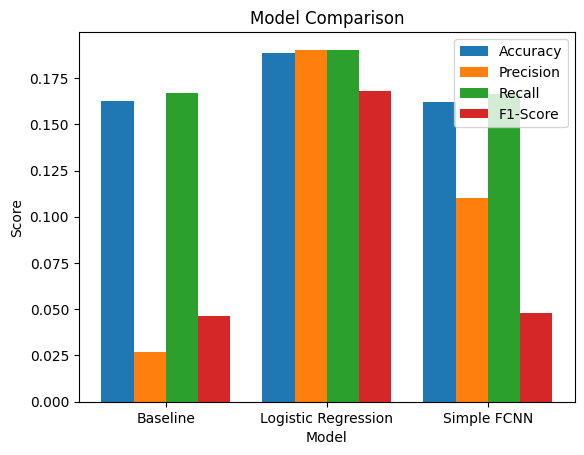

In [240]:
# Extract metrics for visualization
models = list(comparison.keys())
accuracy = [comparison[model]['Accuracy'] for model in models]
precision = [comparison[model]['Precision'] for model in models]
recall = [comparison[model]['Recall'] for model in models]
f1_scores = [comparison[model]['F1-Score'] for model in models]

# Plot bar chart
x = range(len(models))
plt.bar(x, accuracy, width=0.2, label='Accuracy', align='center')
plt.bar([p + 0.2 for p in x], precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.4 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.6 for p in x], f1_scores, width=0.2, label='F1-Score', align='center')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks([p + 0.3 for p in x], models)
plt.legend()
plt.show()


In [241]:
!pip install --upgrade tensorflow

#FCNN with GLOVE emedding




In [243]:
import numpy as np

# 1. Load Pretrained GloVe Embeddings
embedding_dim = 100  # Match the chosen GloVe dimension
embedding_file_path = '/content/drive/My Drive/kaggle_files/glove.6B.100d.txt'
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df_downsampled['text'])
sequences = tokenizer.texts_to_sequences(df_downsampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_downsampled['label'], test_size=0.2, random_state=42)


# Create a dictionary to store word vectors
embeddings_index = {}
with open(embedding_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coeffs

print(f"Loaded {len(embeddings_index)} word vectors.")

# 2. Create Embedding Matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if index < vocab_size:
        embedding_vector = embeddings_index.get(word)  # Get the vector for the word
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

# 3. Modify the Embedding Layer
baseline_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length,
              weights=[embedding_matrix], trainable=False),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),                       # Dropout layer
    Dense(6, activation='softmax')
])

# Compile the model
baseline_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
baseline_history = baseline_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(X_test, y_test)
print(f'Baseline Test Accuracy with Pretrained Embeddings: {baseline_test_acc}')

baseline_model.summary()


Loaded 400000 word vectors.
Epoch 1/20
1123/1123 - 9s - 8ms/step - accuracy: 0.6525 - loss: 0.9096 - val_accuracy: 0.8376 - val_loss: 0.4763
Epoch 2/20
1123/1123 - 7s - 6ms/step - accuracy: 0.8497 - loss: 0.4448 - val_accuracy: 0.8520 - val_loss: 0.4092
Epoch 3/20
1123/1123 - 7s - 6ms/step - accuracy: 0.8864 - loss: 0.3360 - val_accuracy: 0.8779 - val_loss: 0.3330
Epoch 4/20
1123/1123 - 7s - 6ms/step - accuracy: 0.9041 - loss: 0.2753 - val_accuracy: 0.8791 - val_loss: 0.3450
Epoch 5/20
1123/1123 - 7s - 6ms/step - accuracy: 0.9159 - loss: 0.2380 - val_accuracy: 0.8766 - val_loss: 0.3539
Epoch 6/20
1123/1123 - 7s - 6ms/step - accuracy: 0.9221 - loss: 0.2121 - val_accuracy: 0.8836 - val_loss: 0.3285
Epoch 7/20
1123/1123 - 7s - 6ms/step - accuracy: 0.9321 - loss: 0.1868 - val_accuracy: 0.8916 - val_loss: 0.3166
Epoch 8/20
1123/1123 - 7s - 6ms/step - accuracy: 0.9365 - loss: 0.1698 - val_accuracy: 0.8861 - val_loss: 0.3283
Epoch 9/20
1123/1123 - 7s - 6ms/step - accuracy: 0.9387 - loss: 0.16

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 96, 128)             │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_11              │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,244,244 (4.75 MB)

 Trainable params: 81,414 (318.02 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

 Optimizer params: 162,830 (636.06 KB)

# Implement CNN using self embedding(used for the project)

In [245]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Parameters
vocab_size = 10000
embedding_dim = 100
max_length = 100
trunc_type = 'post'
padding_type = 'post'

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token='')
tokenizer.fit_on_texts(df_downsampled['text'])
sequences = tokenizer.texts_to_sequences(df_downsampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_downsampled['label'], test_size=0.2, random_state=42)

# Build the CNN model with Dropout
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    Dropout(0.5),  # Added dropout to prevent overfitting
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Additional dropout layer
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Model summary
model.summary()


Epoch 1/20
1123/1123 - 11s - 10ms/step - accuracy: 0.7583 - loss: 0.6335 - val_accuracy: 0.9323 - val_loss: 0.2228
Epoch 2/20
1123/1123 - 9s - 8ms/step - accuracy: 0.9335 - loss: 0.1977 - val_accuracy: 0.9321 - val_loss: 0.1898
Epoch 3/20
1123/1123 - 9s - 8ms/step - accuracy: 0.9436 - loss: 0.1556 - val_accuracy: 0.9318 - val_loss: 0.1873
Epoch 4/20
1123/1123 - 9s - 8ms/step - accuracy: 0.9489 - loss: 0.1313 - val_accuracy: 0.9295 - val_loss: 0.1912
Epoch 5/20
1123/1123 - 9s - 8ms/step - accuracy: 0.9549 - loss: 0.1163 - val_accuracy: 0.9307 - val_loss: 0.1893
Epoch 6/20
1123/1123 - 9s - 8ms/step - accuracy: 0.9584 - loss: 0.1048 - val_accuracy: 0.9222 - val_loss: 0.2015
Epoch 7/20
1123/1123 - 9s - 8ms/step - accuracy: 0.9616 - loss: 0.0949 - val_accuracy: 0.9228 - val_loss: 0.2179
Epoch 8/20
1123/1123 - 9s - 8ms/step - accuracy: 0.9648 - loss: 0.0885 - val_accuracy: 0.9196 - val_loss: 0.2352
Epoch 9/20
1123/1123 - 9s - 8ms/step - accuracy: 0.9656 - loss: 0.0855 - val_accuracy: 0.9126 

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 96, 128)             │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 96, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_13              │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,244,244 (12.38 MB)

 Trainable params: 1,081,414 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,162,830 (8.25 MB)

In [246]:
# Generate predictions
y_pred = model.predict(X_test).argmax(axis=1)

# Classification report
print(classification_report(y_test, y_pred))

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1459
           1       0.93      0.87      0.90      1492
           2       0.89      0.97      0.93      1490
           3       0.94      0.94      0.94      1531
           4       0.89      0.85      0.87      1552
           5       0.89      0.92      0.91      1460

    accuracy                           0.91      8984
   macro avg       0.91      0.91      0.91      8984
weighted avg       0.91      0.91      0.91      8984



# Hybrid BiLSTM-CNN Model for Text Classification


In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM
# Parameters

vocab_size = 10000
embedding_dim = 100
max_length = 100
trunc_type = 'post'
padding_type = 'post'

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df_downsampled['text'])
sequences = tokenizer.texts_to_sequences(df_downsampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_downsampled['label'], test_size=0.2, random_state=42)

# Build the CNN model
model_bidrectional = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile the model
model_bidrectional.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_bidrectional.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_loss, test_acc = model_bidrectional.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')




# Hybrid BiLSTM-CNN Model for Text Classification With Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Parameters
vocab_size = 10000
embedding_dim = 100
max_length = 100
trunc_type = 'post'
padding_type = 'post'

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df_downsampled['text'])
sequences = tokenizer.texts_to_sequences(df_downsampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_downsampled['label'], test_size=0.2, random_state=42)

# Build the CNN model with Bidirectional LSTM
model_earlystopping = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile the model
model_earlystopping.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model with Early Stopping
history = model_earlystopping.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],  # Include Early Stopping
    verbose=2
)

# Evaluate the model
test_loss, test_acc = model_earlystopping.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Generate predictions
baseline_predictions = np.argmax(baseline_model.predict(X_test), axis=1)
normal_predictions = np.argmax(model.predict(X_test), axis=1)
earlystopping_predictions = np.argmax(model_earlystopping.predict(X_test), axis=1)
bidrectional_predictions = np.argmax(model_bidrectional.predict(X_test), axis=1)

# Generate predictions
baseline_predictions = np.argmax(baseline_model.predict(X_test), axis=1)
cnn_predictions = np.argmax(model.predict(X_test), axis=1)


#Bidirectional LSTM-based Sentiment Classifier with Dropout and Dense Layers

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import numpy as np

# Hyperparameters
vocab_size = 10000
embedding_dim = 100
max_length = 100
padding_type = 'post'
trunc_type = 'post'

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df_downsampled['text'])
sequences = tokenizer.texts_to_sequences(df_downsampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_downsampled['label'], test_size=0.2, random_state=42)

# Model Definition
inputs = Input(shape=(max_length,))
embedding = Embedding(vocab_size, embedding_dim)(inputs)
bi_lstm = Bidirectional(LSTM(128, return_sequences=True))(embedding)
global_avg_pooling = GlobalAveragePooling1D()(bi_lstm)
dropout = Dropout(0.5)(global_avg_pooling)
dense = Dense(128, activation='relu')(dropout)
outputs = Dense(6, activation='softmax')(dense)

model = Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train/validation split from training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=64, verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Display model summary
model.summary()


#Comparing the models


In [ ]:
# Generate classification reports
baseline_report = classification_report(y_test, baseline_predictions, output_dict=True)
normal_report = classification_report(y_test, normal_predictions, output_dict=True)
earlystopping_report = classification_report(y_test, earlystopping_predictions, output_dict=True)
bidirectional_report = classification_report(y_test, bidrectional_predictions, output_dict=True)

# Extract relevant metrics for each model
comparison_data = {
    'Model': ['Baseline', 'Normal CNN', 'Early Stopping CNN', 'Bidirectional LSTM'],
    'Precision': [
        baseline_report['macro avg']['precision'],
        normal_report['macro avg']['precision'],
        earlystopping_report['macro avg']['precision'],
        bidirectional_report['macro avg']['precision']
    ],
    'Recall': [
        baseline_report['macro avg']['recall'],
        normal_report['macro avg']['recall'],
        earlystopping_report['macro avg']['recall'],
        bidirectional_report['macro avg']['recall']
    ],
    'F1-Score': [
        baseline_report['macro avg']['f1-score'],
        normal_report['macro avg']['f1-score'],
        earlystopping_report['macro avg']['f1-score'],
        bidirectional_report['macro avg']['f1-score']
    ],
    'Accuracy': [
        baseline_report['accuracy'],
        normal_report['accuracy'],
        earlystopping_report['accuracy'],
        bidirectional_report['accuracy']
    ]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Check DataFrame structure (debugging step)
print(comparison_df)

# Plot metrics
comparison_df.set_index('Model')[['Precision', 'Recall', 'F1-Score', 'Accuracy']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0.5, 1.0)  # Adjust as needed
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification reports
baseline_report = classification_report(y_test, baseline_predictions, output_dict=True)
cnn_report = classification_report(y_test, cnn_predictions, output_dict=True)

# Convert reports to DataFrames for easier viewing
import pandas as pd
baseline_df = pd.DataFrame(baseline_report).transpose()
cnn_df = pd.DataFrame(cnn_report).transpose()

# Save reports to CSV (optional)
baseline_df.to_csv("baseline_classification_report.csv")
cnn_df.to_csv("cnn_classification_report.csv")

# Print reports
print("Baseline Model Classification Report:")
print(baseline_df)

print("\nCNN Model Classification Report:")
print(cnn_df)



In [ ]:
!apt-get install -y graphviz
!pip install pydot


In [ ]:
# Save the model as an HDF5 file
model.save("improved_fcnn_model.h5")
fcnn_model.save("fcnn_model.h5")

from google.colab import files

files.download("improved_fcnn_model.h5")



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrices
baseline_cm = confusion_matrix(y_test, baseline_predictions)
cnn_cm = confusion_matrix(y_test, cnn_predictions)

# Define a plotting function
def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Unique labels
unique_labels = sorted(np.unique(y_test))

# Plot for baseline model
plot_confusion_matrix(baseline_cm, "Baseline Model Confusion Matrix", labels=unique_labels)

# Plot for CNN model
plot_confusion_matrix(cnn_cm, "CNN Model Confusion Matrix", labels=unique_labels)


# Comparing with existing methods (people in kaggle that also tried this dataset)

# Trying different techniques for embedding

In [ ]:
stemer = PorterStemmer()
stp_words = stopwords.words("english")
def preprocess(text):
    preprocessed_txt = ""
    tokens = word_tokenize(text)
    for token in tokens:
        if token not in stp_words :
            lower_token = token.lower()
            stemed_token = stemer.stem(lower_token)
            preprocessed_txt += stemed_token + " "
    else:
        preprocessed_txt = preprocessed_txt[:-1]
    return preprocessed_txt

In [ ]:
# Now we will apply undersampling to the majority class to match class 5

# Separate the dataset by class
df_0 = original_df[original_df['label'] == 0]
df_1 = original_df[original_df['label'] == 1]
df_2 = original_df[original_df['label'] == 2]
df_3 = original_df[original_df['label'] == 3]
df_4 = original_df[original_df['label'] == 4]
df_5 = original_df[original_df['label'] == 5]

# Saving the amount of data in label 5
n_samples_label_5 = round(len(df_5) / 2)

# Downsample the majority classes to n_samples_label_5 samples
# The random_state variable act like a seed.
# Setting random_state=42 helps in making your code reproducible and ensures that the results are consistent across different runs.
df_0_downsampled = resample(df_0, replace=False, n_samples=n_samples_label_5, random_state=42)
df_1_downsampled = resample(df_1, replace=False, n_samples=n_samples_label_5, random_state=42)
df_2_downsampled = resample(df_2, replace=False, n_samples=n_samples_label_5, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=n_samples_label_5, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=n_samples_label_5, random_state=42)
df_5_downsampled = resample(df_5, replace=False, n_samples=n_samples_label_5, random_state=42)

# Combine the downsampled data with the minority class data along the y-axis
df_downsampled_second = pd.concat([df_1_downsampled, df_0_downsampled, df_3_downsampled, df_4_downsampled, df_2_downsampled, df_5_downsampled])

# Shuffle the combined dataset
df_downsampled_second = df_downsampled_second.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of data for each class is: {n_samples_label_5}")
classes_plot(df_downsampled_second)
df_downsampled_second.head()